| 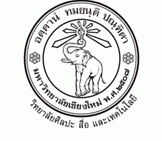 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;          |        <em><font size=5>Department of Modern Management and <br> Information Technology </font></em><br>  <font size=3>College of Arts, Media and Technology,<br> Chiang Mai University<br></font> Midterm Examination, Academic Year 2021 <br> Business Data Mining 954471
|:- |-: 
|<strong>October 18th, 2021 8:00 - 23:59 </strong>| <strong>(Total 35 Points) </strong>

<b>Name Ruangkhaw Sinwaninthaloet      Student ID 612110185 </b>

Instructions: 

-	This exam is worth 35% of your final grade.
-	This exam consists of 5 Questions
-	Finish this exam, download it as .ipynb file and send it to my FB messenger.
-	Write your student ID as filename. 
-	Allow anything.
-	<b>Please do this exam alone and be honest to yourself. </b>
-	The time allowed students to leave the testing room after the exam is open to copy it.
-	Students who cheat in any way will be prosecuted by the CMU regulation BE 2554, which governs student behavior and describes discipline during the exam period. The proctor must report any suspected cheating to the director.
<br>

### <em>Score Sheet:</em>
|<font size=3> Question|<font size=3> Full Mark|<font size=3> Student’s Mark|
|:- |:-:|:-:
<font size=3> Q1 |<font size=3> 5|
<font size=3> Q2 |<font size=3> 5|
<font size=3> Q3 |<font size=3> 5|
<font size=3> Q4 |<font size=3> 10|
<font size=3> Q5 |<font size=3> 10|
<font size=3> Total|<font size=3> 35|








In [30]:
import numpy as np
import pandas as pd

#### Q1. Create Model to predict the Telco customer churn (Churn = Label).
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [2]:
df = pd.read_csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

In [3]:
df.isnull().sum(axis=0)

In [4]:
df.dtypes

In [5]:
df.isna().sum()

In [6]:
df_clean = df.drop(['customerID','gender','Partner','Dependents','MonthlyCharges','TotalCharges'],axis = 1)


In [7]:
df_clean

In [8]:
df_clean['PhoneService'] = df_clean['PhoneService'].replace('No','0')
df_clean['PhoneService'] = df_clean['PhoneService'].replace('Yes','1')

df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('No phone service','0')
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('No','1')
df_clean['MultipleLines'] = df_clean['MultipleLines'].replace('Yes','2')

df_clean['InternetService'] = df_clean['InternetService'].replace('DSL','0')
df_clean['InternetService'] = df_clean['InternetService'].replace('Fiber optic','1')
df_clean['InternetService'] = df_clean['InternetService'].replace('No','2')

df_clean['OnlineSecurity'] = df_clean['OnlineSecurity'].replace('No internet service','0')
df_clean['OnlineSecurity'] = df_clean['OnlineSecurity'].replace('No','1')
df_clean['OnlineSecurity'] = df_clean['OnlineSecurity'].replace('Yes','2')

df_clean['OnlineBackup'] = df_clean['OnlineBackup'].replace('No internet service','0')
df_clean['OnlineBackup'] = df_clean['OnlineBackup'].replace('No','1')
df_clean['OnlineBackup'] = df_clean['OnlineBackup'].replace('Yes','2')

df_clean['DeviceProtection'] = df_clean['DeviceProtection'].replace('No internet service','0')
df_clean['DeviceProtection'] = df_clean['DeviceProtection'].replace('No','1')
df_clean['DeviceProtection'] = df_clean['DeviceProtection'].replace('Yes','2')

df_clean['TechSupport'] = df_clean['TechSupport'].replace('No internet service','0')
df_clean['TechSupport'] = df_clean['TechSupport'].replace('No','1')
df_clean['TechSupport'] = df_clean['TechSupport'].replace('Yes','2')

df_clean['StreamingTV'] = df_clean['StreamingTV'].replace('No internet service','0')
df_clean['StreamingTV'] = df_clean['StreamingTV'].replace('No','1')
df_clean['StreamingTV'] = df_clean['StreamingTV'].replace('Yes','2')

df_clean['StreamingMovies'] = df_clean['StreamingMovies'].replace('No internet service','0')
df_clean['StreamingMovies'] = df_clean['StreamingMovies'].replace('No','1')
df_clean['StreamingMovies'] = df_clean['StreamingMovies'].replace('Yes','2')

df_clean['Contract'] = df_clean['Contract'].replace('Month-to-month','0')
df_clean['Contract'] = df_clean['Contract'].replace('One year','1')
df_clean['Contract'] = df_clean['Contract'].replace('Two year','2')

df_clean['PaperlessBilling'] = df_clean['PaperlessBilling'].replace('No','1')
df_clean['PaperlessBilling'] = df_clean['PaperlessBilling'].replace('Yes','2')

df_clean['PaymentMethod'] = df_clean['PaymentMethod'].replace('Electronic check','0')
df_clean['PaymentMethod'] = df_clean['PaymentMethod'].replace('Mailed check','1')
df_clean['PaymentMethod'] = df_clean['PaymentMethod'].replace('Bank transfer (automatic)','2')
df_clean['PaymentMethod'] = df_clean['PaymentMethod'].replace('Credit card (automatic)','3')

df_clean['Churn'] = df_clean['Churn'].replace('No','1')
df_clean['Churn'] = df_clean['Churn'].replace('Yes','2')

In [9]:
df_clean

In [10]:
df_clean.isnull().sum(axis=0)

In [11]:
X = df_clean.drop('Churn', axis = 1)
y = df_clean['Churn']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], 
    'gamma' : [0.1,1,10,100,1000] 
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [17]:
yp = clf.predict(X_test)
acc = sum(yp == y_test)/len(y_test)
print("Test accuracy : "+str(acc))

#### Q2. Create Model to predict the spam mail utilizing feature selection method. (Column 0 = Label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [18]:
df = pd.read_csv("../input/plenoi-mail/MAIL.csv", header = None)
df_test = pd.read_csv("../input/plenoi-mail/MAIL_test.csv", header = None)
df_test.head()

In [19]:
df.shape

In [20]:
df.dtypes

In [21]:
df.isnull().any()

In [22]:
df.groupby(0)[0].count()

In [28]:
X = df.drop([0],axis=1).values
y = df[0].values

In [29]:
df[0].unique()

In [30]:
np.unique(y)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [32]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1,1,10,100,200,500]}
clf = GridSearchCV(LogisticRegression(random_state=1, solver='liblinear'),params, cv=10) # model name
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

#### Q3. Create Deep Learning Model to predict the quality of wine. Our model will focus only on wine with quality of 5, 6, 7 (quality = label)
<b><font color=red>The difference of Train and Test accuracy must be lower than 10% to get full score.</font></b>

In [40]:
df = pd.read_csv("../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
df.head()

In [41]:
df.groupby("quality")["quality"].count()

In [47]:
df["quality"].unique()

In [48]:
df_sel = df[(df["quality"]==5) | (df["quality"]==6) | (df["quality"]==7)]
df_sel.shape

In [50]:
Xo = df_sel.drop(["quality"],axis=1).values
yo = df_sel["quality"].values

In [51]:
Xo.shape
Xo

In [52]:
np.unique(yo)

In [53]:
yo.shape

In [54]:
np.unique(yo)

In [55]:
yo[yo==5] = 1
yo[yo==6] = 2
yo[yo==7] = 3
np.unique(yo)

In [56]:
[sum(yo == item) for item in np.unique(yo)]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y, yt = train_test_split(Xo, yo, test_size=0.2, random_state=0)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_val, y, yv = train_test_split(X_train, y, test_size=0.2, random_state=0)

In [64]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(X_train, y)

from sklearn.preprocessing import MinMaxScaler
scl = MinMaxScaler()
scl.fit(X_res)
X_train_norm = scl.transform(X_res)
X_val_norm = scl.transform(X_val)
X_test_norm = scl.transform(X_test)
y = y_res

In [65]:
X_train_norm.shape

In [66]:
y.shape

In [67]:
num_label = len(np.unique(y)) 
y_multi = (np.arange(num_label) == y[:,None]).astype(np.float32)
yv_multi = (np.arange(num_label) == yv[:,None]).astype(np.float32)
yt_multi = (np.arange(num_label) == yt[:,None]).astype(np.float32)

In [68]:
sample_size, input_size = X_train_norm.shape

In [97]:
import tensorflow as tf
def create_model(input_size, num_label):
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='relu', input_shape=(input_size,)),  
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(2, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(num_label, activation='softmax')    
    ])
    return model

In [101]:
model = create_model(input_size, num_label)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train_acc = list()
val_acc = list()
for i in range(0,50):
  history = model.fit(X_train_norm, y_multi, epochs= 2, batch_size = sample_size, validation_data= (X_val, yv_multi))
  tmp_avg = np.mean(history.history['loss'])
  tmp_avg_val = np.mean(history.history['val_loss'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [103]:
yp = model.predict(X_test_norm)
yp = np.argmax(yp, 1)
sum(yp == yt)/len(yt)

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

In [13]:
import os
for dirname, _, filenames in os.walk('../input/food41/images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [33]:
import glob
filename = glob.glob("/kaggle/input/food41/images/pizza/*.*")
filename[0]

In [34]:
filename[0].split("_")

In [35]:
filename[0].split("_")[-1].split(".")[0]

In [36]:
label = np.array([(item.split("_")[-1].split(".")[0]) for item in filename])

In [43]:
import glob
filename = glob.glob("../input/food41/images/pizza/*.*")
filename[0]

In [38]:
filename[0].split("_")

In [39]:
filename[0].split("_")[-1].split(".")[0]

In [40]:
label = np.array([(item.split("_")[-1].split(".")[0]) for item in filename])

In [44]:
!mkdir train
!mkdir train/pizza
!mkdir train/ramen

#### Q5. Create an object detection model to detect your own face in the picture. (Show me that the model can detect your face in a test image.)
<b><font color=red>The model must be able to detect your face to get full score.</font></b>